# Tarea 3: Evaluación de Segmentación


## 1. Importaciones y Configuración

In [1]:
# Instalación de PyTorch con soporte CUDA
#pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Verificar instalación de PyTorch y disponibilidad de GPU
import torch

# Verificar disponibilidad de CUDA
print("CUDA disponible:", torch.cuda.is_available())

if torch.cuda.is_available():
    # Información de la GPU
    print("GPU:", torch.cuda.get_device_name(0))
    print("Versión CUDA:", torch.version.cuda)
    
    # Prueba simple con un tensor en GPU
    x = torch.rand(5,3).cuda()
    print("\nTensor en GPU:", x)

CUDA disponible: True
GPU: NVIDIA GeForce RTX 4060 Ti
Versión CUDA: 12.1

Tensor en GPU: tensor([[0.9998, 0.8402, 0.0666],
        [0.5053, 0.7896, 0.1785],
        [0.9069, 0.9400, 0.1996],
        [0.7298, 0.6497, 0.3439],
        [0.7545, 0.8176, 0.8476]], device='cuda:0')


In [7]:
# 1. Importaciones y Configuración
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage import segmentation
print("Todas las dependencias están correctamente instaladas")

Todas las dependencias están correctamente instaladas


## 2. Funciones de Carga y Visualización

In [3]:
# 2. Funciones de Carga y Visualización

In [10]:
def load_images():
    # Código para cargar imágenes
    # Definir las carpetas de datos
    data_folders = ['train', 'test', 'val']
    images = {}
    
    # Cargar imágenes de cada carpeta
    for folder in data_folders:
        folder_path = os.path.join('..', 'images', folder)
        try:
            # Listar archivos de imagen en la carpeta
            image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
            
            # Cargar cada imagen
            folder_images = []
            for img_file in image_files:
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convertir de BGR a RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    folder_images.append(img)
                    
            images[folder] = folder_images
            print(f"Cargadas {len(folder_images)} imágenes de {folder}")
            
        except Exception as e:
            print(f"Error al cargar imágenes de {folder}: {str(e)}")
    
    return images    

In [11]:
images = load_images()

Cargadas 200 imágenes de train
Cargadas 200 imágenes de test
Cargadas 100 imágenes de val


In [13]:
def show_results():
    # Código para visualizar resultados
    # Mostrar algunas imágenes de ejemplo de cada conjunto
    plt.figure(figsize=(15, 5))
    
    for idx, (folder, folder_images) in enumerate(images.items()):
        if folder_images:  # Si hay imágenes en el folder
            plt.subplot(1, 3, idx+1)
            plt.imshow(folder_images[0])  # Mostrar primera imagen de cada folder
            plt.title(f'Ejemplo de {folder}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar información sobre la cantidad de imágenes
    for folder, folder_images in images.items():
        print(f"Conjunto {folder}: {len(folder_images)} imágenes")
        if folder_images:
            print(f"Dimensiones de ejemplo: {folder_images[0].shape}")
    

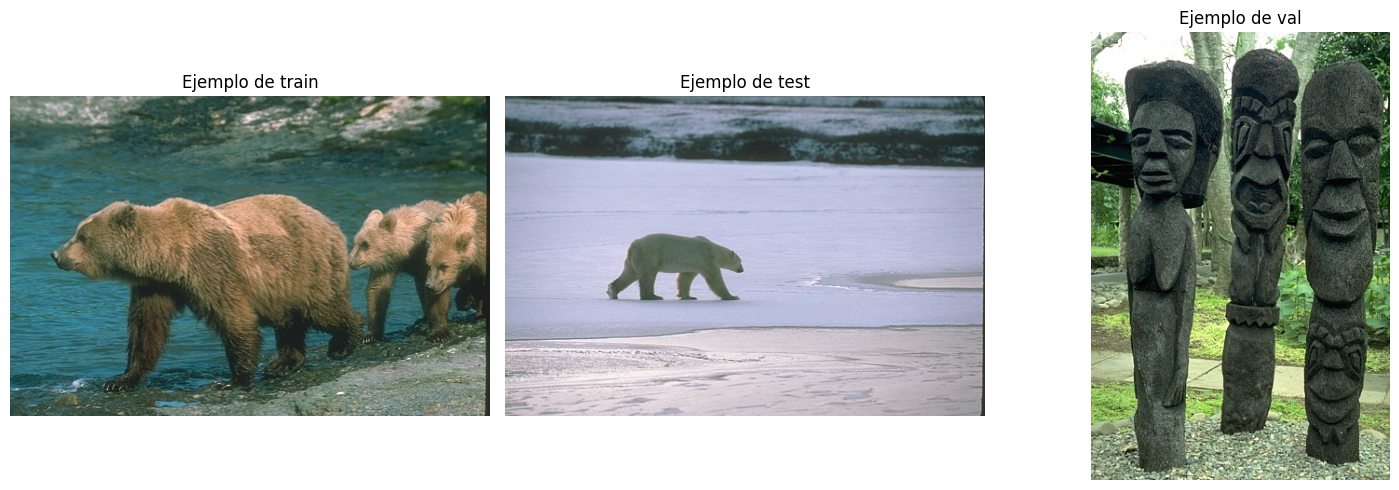

Conjunto train: 200 imágenes
Dimensiones de ejemplo: (321, 481, 3)
Conjunto test: 200 imágenes
Dimensiones de ejemplo: (321, 481, 3)
Conjunto val: 100 imágenes
Dimensiones de ejemplo: (481, 321, 3)


In [14]:
resultados = show_results()

In [ ]:
# 3. Primer Método de Segmentación
def basic_segmentation():
    # Implementación del primer método
    pass

In [ ]:
# 4. Segundo Método de Segmentación
def advanced_segmentation():
    # Implementación del método avanzado
    pass

In [ ]:
# 5. Métricas de Evaluación
def evaluate_segmentation():
    # Código para evaluar resultados
    pass

In [ ]:
# 6. Análisis y Comparación
def compare_methods():
    # Código para comparar métodos
    pass

## TEST

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import matplotlib.pyplot as plt

# Definir las rutas
GT_DIR = r"K:\Maestria\Percepción Computacional\tarea\t3\evaluacion-de-segmentacion\ground_truth"
IMG_DIR = r"K:\Maestria\Percepción Computacional\tarea\t3\evaluacion-de-segmentacion\images"



In [18]:
class BSDB500Dataset(Dataset):
    def __init__(self, images_root, gt_root, split='train', transform=None):
        self.images_dir = os.path.join(images_root, split)
        self.masks_dir = os.path.join(gt_root, split)
        self.transform = transform
        
        # Lista de imágenes
        self.images = [f for f in os.listdir(self.images_dir) if f.endswith('.jpg')]
        print(f"Encontradas {len(self.images)} imágenes en {split}")
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        mask_path = os.path.join(self.masks_dir, img_name.replace('.jpg', '.png'))
        
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        if self.transform:
            image = self.transform['image'](image)
            mask = self.transform['mask'](mask)
        
        return image, mask



In [19]:
# Configurar transformaciones
transforms_dict = {
    'image': transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ]),
    'mask': transforms.Compose([
        transforms.Resize((320, 320)),
        transforms.ToTensor()
    ])
}



In [20]:
# Verificar la carga de datos
def test_dataset():
    # Crear datasets
    train_dataset = BSDB500Dataset(IMG_DIR, GT_DIR, 'train', transforms_dict)
    val_dataset = BSDB500Dataset(IMG_DIR, GT_DIR, 'val', transforms_dict)
    test_dataset = BSDB500Dataset(IMG_DIR, GT_DIR, 'test', transforms_dict)
    
    # Crear dataloaders
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    
    # Obtener y visualizar un batch
    images, masks = next(iter(train_loader))
    
    print("Forma de las imágenes:", images.shape)
    print("Forma de las máscaras:", masks.shape)
    
    # Visualizar imágenes y máscaras
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    
    for i in range(4):
        # Mostrar imagen original
        img = images[i].permute(1, 2, 0)
        img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
        img = img.clip(0, 1)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Imagen')
        
        # Mostrar máscara
        mask = masks[i].squeeze()
        axes[1, i].imshow(mask, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('Máscara')
    
    plt.tight_layout()
    plt.show()



In [ ]:
if __name__ == "__main__":
    # Verificar disponibilidad de GPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Usando dispositivo: {device}")
    
    # Probar la carga de datos
    test_dataset()

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
import cv2
import numpy as np
from PIL import Image

# Definimos la arquitectura U-Net
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Encoder
        self.encoder1 = self.conv_block(3, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        
        # Decoder
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder3 = self.conv_block(256, 128)
        self.upconv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder2 = self.conv_block(128, 64)
        
        # Final conv
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        # Encoding
        enc1 = self.encoder1(x)
        enc1_pool = nn.MaxPool2d(2)(enc1)
        enc2 = self.encoder2(enc1_pool)
        enc2_pool = nn.MaxPool2d(2)(enc2)
        enc3 = self.encoder3(enc2_pool)
        
        # Decoding
        dec3 = self.upconv3(enc3)
        dec3 = torch.cat((enc2, dec3), dim=1)
        dec3 = self.decoder3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((enc1, dec2), dim=1)
        dec2 = self.decoder2(dec2)
        
        return torch.sigmoid(self.final_conv(dec2))

# Dataset personalizado para BSDB500
class BSDB500Dataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '.png'))
        
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        
        if self.transform:
            image = self.transform(image)
            mask = transforms.ToTensor()(mask)
            
        return image, mask

# Configuración del entrenamiento
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, masks) in enumerate(train_loader):
            images = images.to(device)
            masks = masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if i % 10 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {i}, Loss: {running_loss/(i+1):.4f}')

In [ ]:
# Configuración
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Transformaciones
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Crear dataset y dataloader
dataset = BSDB500Dataset(
    image_dir=os.path.join('..', 'images', folder),
    mask_dir=os.path.join('..', 'images', folder),
    transform=transform
)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Entrenar el modelo
train_model(model, train_loader, criterion, optimizer, device)

In [ ]:
def predict_segmentation(model, image_path, device):
    # Preparar la imagen
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Predicción
    model.eval()
    with torch.no_grad():
        prediction = model(image_tensor)
        prediction = prediction.squeeze().cpu().numpy()
    
    return prediction

# Usar el modelo entrenado
prediction = predict_segmentation(model, 'ruta/a/imagen_prueba.jpg', device)